In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.ensemble import RandomForestRegressor
import sys
from sklearn.model_selection import train_test_split
import pydot

from sklearn.tree import export_graphviz

In [2]:
df_all_seasons_home = pd.read_pickle('df_all_seasons_principles')

In [3]:
import pandas as pd
import sys

def avg_goal_diff(df, avg_h_a_diff, a_h_team, a_h_goal_letter):
    """
    input: 
        df = dataframe with all results
        avg_h_a_diff = name of the new column
        a_h_team = HomeTeam or AwayTeam
        a_h_goal_letter = 'H' for home or 'A' for away
    output: 
        avg_per_team = dictionary with with team as key and columns as values with new column H/ATGDIFF
    """
    df[avg_h_a_diff] = 0
    avg_per_team = {}
    all_teams = df[a_h_team].unique()
    for t in all_teams:
        df_team = df[df[a_h_team]==t].fillna(0)
        result = df_team['{}TGDIFF'.format(a_h_goal_letter)].rolling(10).mean()
        df_team[avg_h_a_diff] = result.shift(-9)
        avg_per_team[t] = df_team
    return avg_per_team

def avg_goals(df,h_or_a_avg, h_or_a_team, h_or_a_letter):
    """
    input: 
        df = dataframe with all results
        h_or_a_avg = name of the new column
        a_h_team = HomeTeam or AwayTeam
        a_h_goal_letter = 'H' for home or 'A' for away
    """
    df[h_or_a_avg] = 0
    avg_goals_team = {}
    all_teams = df[h_or_a_team].unique()
    for t in all_teams:
        df_team = df[df[h_or_a_team]==t].fillna(0)
        result = df_team['FT{}G'.format(h_or_a_letter)].rolling(10).mean()
        df_team[h_or_a_avg] = result.shift(-9)
        avg_goals_team[t] = df_team
    return avg_goals_team

def from_dict_value_to_df(d):
    """
    input = dictionary 
    output = dataframe as part of all the values from the dictionary
    """
    df = pd.DataFrame()
    for v in d.values():
        df = df.append(v)
    return df

def previous_data(df, h_or_a_team, column):

    d = dict()
    team_with_past_dict = dict()
    all_teams = df[h_or_a_team].unique()
    for team in all_teams:
        n_games = len(df[df[h_or_a_team]==team])
        team_with_past_dict[team] = df[df[h_or_a_team]==team]
        for i in range(1, n_games):
            d[i] = team_with_past_dict[team].assign(
                result=team_with_past_dict[team].groupby(h_or_a_team)[column].shift(-i)
            ).fillna({'{}_X'.format(column): 0})
            team_with_past_dict[team]['{}_{}'.format(column, i)] = d[i].result
    return team_with_past_dict

In [4]:
d_all_seasons = avg_goal_diff(df_all_seasons_home, 'AVGHTGDIFF', 'HomeTeam', 'H')

In [5]:
df_all_seasons = from_dict_value_to_df(d_all_seasons)

In [6]:
df_all_seasons=df_all_seasons.sort_values(['Year', 'Month','Day'], ascending=False)

In [7]:
avg_fthg_per_team=avg_goals(df_all_seasons, 'AVGFTHG', 'HomeTeam', 'H')

In [8]:
df_all_seasons = from_dict_value_to_df(avg_fthg_per_team)

In [9]:
df_all_seasons=df_all_seasons.sort_values(['Year', 'Month','Day'], ascending=False)

In [10]:
df_all_seasons.columns

Index(['Day', 'Month', 'Year', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST',
       'AST', 'HTGDIFF', 'ATGDIFF', 'AVGHTGDIFF', 'AVGFTHG'],
      dtype='object')

In [11]:
df_all_seasons.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF,AVGHTGDIFF,AVGFTHG
355,5,12,2017,Everton,Watford,1,0,6,2,1,-1,2.1,3.0
356,5,12,2017,West Brom,Chelsea,0,1,2,5,-1,1,0.2,1.1
272,3,12,2017,Liverpool,Burnley,2,1,3,1,1,-1,0.8,1.9
247,2,12,2017,Burnley,Chelsea,1,1,4,2,0,0,0.2,1.2
248,2,12,2017,Swansea,Leicester,2,0,4,1,2,-2,-0.1,1.3


In [12]:
team_with_past_HTGDIFF=previous_data(df_all_seasons, 'HomeTeam', 'HTGDIFF')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
df_team_with_past_HTGDIFF = from_dict_value_to_df(team_with_past_HTGDIFF)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [14]:
columns_HTGDIFF = [
    'Day', 'Month', 'Year', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
    'HTGDIFF', 'ATGDIFF', 'AVGHTGDIFF','AVGFTHG', 'HST', 'AST',  'HTGDIFF_1', 'HTGDIFF_2', 'HTGDIFF_3', 'HTGDIFF_4', 'HTGDIFF_5', 'HTGDIFF_6', 'HTGDIFF_7',
    'HTGDIFF_8', 'HTGDIFF_9', 'HTGDIFF_10'
]

In [15]:
df_team_with_past_HTGDIFF = df_team_with_past_HTGDIFF.reindex(columns=columns_HTGDIFF)

In [16]:
df_team_with_past_HTGDIFF.fillna(0, inplace=True)

In [17]:
team_with_past_HST=previous_data(df_team_with_past_HTGDIFF, 'HomeTeam', 'HST')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
df_team_with_past_HST = from_dict_value_to_df(team_with_past_HST)

In [19]:
columns_HST =  ['HST_1', 'HST_2', 'HST_3', 'HST_4', 'HST_5', 'HST_6', 'HST_7', 'HST_8', 'HST_9', 'HST_10']
columns_HTGDIFF_HST = columns_HTGDIFF + columns_HST

In [20]:
df_team_with_past_HST = df_team_with_past_HST.reindex(columns=columns_HTGDIFF_HST)

In [21]:
df_team_with_past_HST.fillna(0, inplace=True)

In [22]:
team_with_past_FTHG = previous_data(df_team_with_past_HST, 'HomeTeam', 'FTHG')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
df_team_with_past_FTHG = from_dict_value_to_df(team_with_past_FTHG)

In [24]:
columns_FTHG = ['FTHG_1', 'FTHG_2', 'FTHG_3', 'FTHG_4', 'FTHG_5', 'FTHG_6', 'FTHG_7', 'FTHG_8', 'FTHG_9', 'FTHG_10']
columns_HTGDIFF_HST_FTHG = columns_HTGDIFF_HST + columns_FTHG

In [25]:
df_team_with_past_FTHG = df_team_with_past_FTHG.reindex(columns=columns_HTGDIFF_HST_FTHG)

In [26]:
df_team_with_past_FTHG.fillna(0, inplace=True)

In [27]:
df_result = df_team_with_past_FTHG.copy()

In [28]:
df_result.shape

(426, 43)

In [29]:
df_result = df_result.drop(['HomeTeam', 'AwayTeam'], axis = 1)

In [30]:
df_result.head()

,Day,Month,Year,FTHG,FTAG,HTGDIFF,ATGDIFF,AVGHTGDIFF,AVGFTHG,HST,...,FTHG_1,FTHG_2,FTHG_3,FTHG_4,FTHG_5,FTHG_6,FTHG_7,FTHG_8,FTHG_9,FTHG_10
355,5,12,2017,1,0,1,-1,2.1,3.0,6,...,3.0,4.0,0.0,3.0,6.0,4.0,2.0,3.0,4.0,0.0
270,3,11,2017,3,0,3,-3,1.9,2.9,5,...,4.0,0.0,3.0,6.0,4.0,2.0,3.0,4.0,0.0,2.0
310,4,9,2017,4,2,2,-2,1.7,2.8,7,...,0.0,3.0,6.0,4.0,2.0,3.0,4.0,0.0,2.0,1.0
339,30,4,2017,0,3,-3,3,1.5,2.5,4,...,3.0,6.0,4.0,2.0,3.0,4.0,0.0,2.0,1.0,2.0
314,15,4,2017,3,1,2,-2,2.0,2.7,7,...,6.0,4.0,2.0,3.0,4.0,0.0,2.0,1.0,2.0,1.0


In [31]:
print('Shape of features:', df_result.shape)

Shape of features: (426, 41)


In [32]:
target = df_result['FTHG']

# values we want to predict and are not necessary for the random forrest regressor 
# or were identified as noise
df_result= df_result.drop([
    'FTHG','FTAG', 'HTGDIFF', 'ATGDIFF', 'HST', 'AST', 'HTGDIFF_7', 'HTGDIFF_9', 
    'HTGDIFF_10', 'FTHG_5', 'FTHG_8', 'FTHG_10', 'FTHG_4', 'FTHG_7', 'HST_6', 
    'FTHG_3'
], axis = 1)


In [33]:
df_result.columns

Index(['Day', 'Month', 'Year', 'AVGHTGDIFF', 'AVGFTHG', 'HTGDIFF_1',
       'HTGDIFF_2', 'HTGDIFF_3', 'HTGDIFF_4', 'HTGDIFF_5', 'HTGDIFF_6',
       'HTGDIFF_8', 'HST_1', 'HST_2', 'HST_3', 'HST_4', 'HST_5', 'HST_7',
       'HST_8', 'HST_9', 'HST_10', 'FTHG_1', 'FTHG_2', 'FTHG_6', 'FTHG_9'],
      dtype='object')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    df_result, target, test_size = 0.25,random_state = 42
)

In [35]:
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (319, 25)
y_train Shape: (319,)
X_test Shape: (107, 25)
y_test Shape: (107,)


In [36]:
# as baseline we are going to use the HomeTeam Goal averages
features_names = list(df_result.columns)
X_train = np.array(X_train)
base = X_train[:, features_names.index('AVGFTHG')]
#subtracting train result from test data
baseline_errors = abs(base - y_train)
print('MAE: ', round(np.mean(baseline_errors), 2), 'Goals.')

MAE:  1.23 Goals.


In [37]:
import pandas as pd
import numpy as np
import scipy 
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

def random_forrest(
    X_train, y_train,n_estimators=1000,random_state = 42, min_samples_split=2, max_leaf_nodes=None, max_features='auto', max_depth=None, bootstrap=True
    ):
    # making the RandomForestRegressor paramteres changable for hyperparameter optimization
    # as found here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
    regr = RandomForestRegressor(
        n_estimators = n_estimators, 
        random_state = random_state, 
        min_samples_split=min_samples_split, 
        max_leaf_nodes=max_leaf_nodes,
        max_features=max_features,
        max_depth=max_depth,
        bootstrap=bootstrap
        )

    regr.fit(X_train, y_train)
    return regr

def random_search(X_train,y_train, n_estimators=1000, n_iter=10, cv=3):
    # creating the parameter grid with variables
    param_grid = {
        'n_estimators': np.linspace(10, n_estimators).astype(int),
        'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
        'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
        'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
        'min_samples_split': [2, 5, 10],
        'bootstrap': [True, False]
    }

    # RandomForestClassifier selected as estimator
    clf = RandomForestClassifier(random_state = 42)

    # create randomized search 
    # as described here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
    rscv = RandomizedSearchCV(clf, param_grid, n_jobs = -1, cv = cv, 
                            n_iter = n_iter, verbose = 1, random_state=42)

    # refit 
    rscv.fit(X_train,y_train)
    return rscv

def performance_accuracy(y_test,X_test, regr):
    """
    input:
        y_test
        X_test
        regr = random forest regressor
    output:
        Mean Absolute Error(MAE)
        regr Accuracy
    """
    errors = abs(abs(np.round(regr.predict(X_test),0)) - y_test)
    accuracy = (errors==0).sum() / len(errors) * 100

    print('MAE:', round(np.mean(errors),2), 'Goals.')
    print('regr Accuracy:', round(accuracy, 2), '%.')  

In [38]:
# fitting the random forrest model at the begining with 1000 estimators
rf = random_forrest(X_train, y_train, n_estimators=1000,random_state = 42)

In [39]:
performance_accuracy(y_test,X_test, rf)

MAE: 0.96 Goals.
regr Accuracy: 28.04 %.


In [40]:
features=np.array(df_result)
predictions_FTHG = rf.predict(features)
next_games_predictions=np.round(predictions_FTHG,0)

In [41]:
#inserting predicted goals into original dataframe
df_all_seasons['FTHG'] = next_games_predictions
df_all_seasons.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF,AVGHTGDIFF,AVGFTHG
355,5,12,2017,Everton,Watford,3.0,0,6,2,1,-1,2.1,3.0
356,5,12,2017,West Brom,Chelsea,3.0,1,2,5,-1,1,0.2,1.1
272,3,12,2017,Liverpool,Burnley,3.0,1,3,1,1,-1,0.8,1.9
247,2,12,2017,Burnley,Chelsea,1.0,1,4,2,0,0,0.2,1.2
248,2,12,2017,Swansea,Leicester,3.0,0,4,1,2,-2,-0.1,1.3


In [42]:
rf_depth_4 = random_forrest(X_train, y_train, n_estimators=10,random_state = 42, max_depth = 4)

# randomly pick one tree from ten
tree_4 = rf_depth_4.estimators_[7]

# use export_graphviz to save the tree as a dot file first as indicated: 
# as described here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
export_graphviz(tree_4, out_file = 'tree_4_home.dot', feature_names = features_names, rounded = True, precision = 1)

# then use the dot file to create a png file 
(graph, ) = pydot.graph_from_dot_file('tree_4_home.dot')
graph.write_png('tree_4_home.png');

In [43]:
print('The depth of this tree is:', tree_4.tree_.max_depth)

The depth of this tree is: 4


In [44]:
# creates a list of feature names and their importance
importance = np.round(rf.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:15} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: AVGFTHG         10.74%
Feature Importance: Day             8.64%
Feature Importance: AVGHTGDIFF      8.53%
Feature Importance: HST_1           8.07%
Feature Importance: Month           6.63%
Feature Importance: HST_2           5.04%
Feature Importance: HST_5           4.61%
Feature Importance: HTGDIFF_3       4.51%
Feature Importance: HTGDIFF_4       4.31%
Feature Importance: HTGDIFF_2       4.07%
Feature Importance: HTGDIFF_1       4.02%
Feature Importance: HST_3           3.85%
Feature Importance: HST_4           3.37%
Feature Importance: HST_7           2.73%
Feature Importance: HTGDIFF_6       2.69%
Feature Importance: FTHG_6          2.52%
Feature Importance: FTHG_1          2.41%
Feature Importance: HTGDIFF_5       2.33%
Feature Importance: HST_8           2.1%
Feature Importance: FTHG_2          1.79%
Feature Importance: FTHG_9          1.6%
Feature Importance: HST_10          1.55%
Feature Importance: Year            1.4%
Feature Importance: HTGDIFF_8       

In [45]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk')

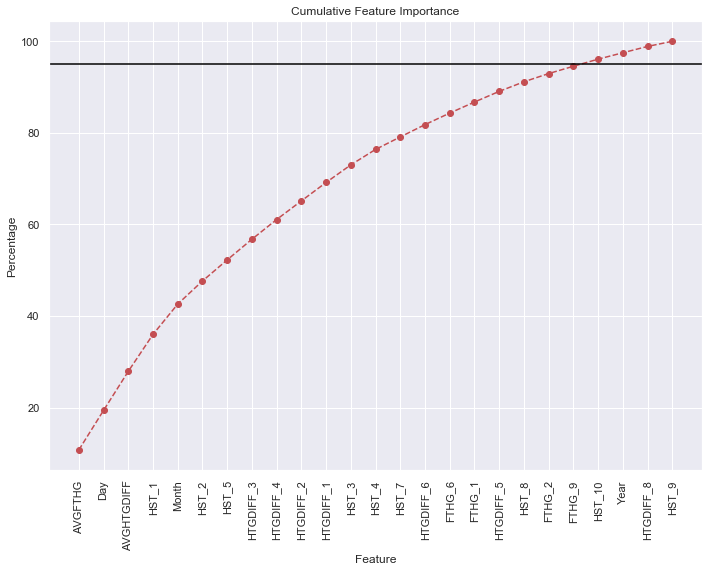

In [46]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
bottom = 0
cum_values=np.cumsum(values)
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
rs = random_search(X_train,y_train,cv=10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


In [49]:
best_params = rs.best_params_

In [50]:
#best params calculated by our search algorithm (rs)
best_params

{'n_estimators': 737,
 'min_samples_split': 10,
 'max_leaf_nodes': 18,
 'max_features': 0.5,
 'max_depth': 17,
 'bootstrap': False}

In [56]:
# reuses newly calculated params
rfc = random_forrest(
    X_train, y_train, 
    n_estimators=best_params['n_estimators'],
    random_state = 42,
    min_samples_split = best_params['min_samples_split'],
    max_leaf_nodes = best_params['max_leaf_nodes'],
    max_features = best_params['max_features'],
    max_depth = best_params['max_depth'],
    bootstrap = best_params['bootstrap']
)

In [57]:
# recalculates new Mean Absolute Error and accuracy
performance_accuracy(y_test,X_test, rfc)

MAE: 0.98 Goals.
regr Accuracy: 28.97 %.


In [61]:
next_games=df_result
# predicts new results with newly calculated params
predictions_next_games = rf.predict(next_games)
next_games_predictions=np.round(predictions_next_games,0)

In [62]:
df_all_seasons['FTHG'] = next_games_predictions
df_all_seasons.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF,AVGHTGDIFF,AVGFTHG
355,5,12,2017,Everton,Watford,3.0,0,6,2,1,-1,2.1,3.0
356,5,12,2017,West Brom,Chelsea,3.0,1,2,5,-1,1,0.2,1.1
272,3,12,2017,Liverpool,Burnley,3.0,1,3,1,1,-1,0.8,1.9
247,2,12,2017,Burnley,Chelsea,1.0,1,4,2,0,0,0.2,1.2
248,2,12,2017,Swansea,Leicester,3.0,0,4,1,2,-2,-0.1,1.3


In [63]:
df_all_seasons.to_excel('df_all_seasons_home.xlsx')